#Reviews web Scraping from FlipKart

In [1]:
pip install requests beautifulsoup4 pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
reveiws=[]
for i in range (1,20):
    url = 'https://www.flipkart.com/sparx-sm-661-running-shoes-men/product-reviews/itm0b79e548993ae?pid=SHOG55HVGHYHG8T9&lid=LSTSHOG55HVGHYHG8T92U55XL&marketplace=FLIPKART'+str(i)
    response = requests.get(url)
    # print(response)


    soup = BeautifulSoup(response.content, 'html.parser')
    
    reveiw=soup.find_all('div',class_="_6K-7Co")
    for i in reveiw:
      reveiw=i.text
      reveiws.append(reveiw)
df = pd.DataFrame({'Reveiws':reveiws})

In [4]:
df.head(20)

,Reveiws
0,Best quality and good looking
1,"Awesome quality, worth buying this productGood..."
2,Good product according to me because is it eas...
3,These shoes are so good that I can't tell it. ...
4,Superb I love❤😘😘 it
5,Looks as depicted and quality and comfort is o...
6,Awesome product
7,Shoe quality is mush better at this prize with...
8,"Colour Is Very Gd , Very Smooth.. I love it"
9,Not bad


In [5]:
df.to_csv("flipkart shoes reviews.csv")

#Sentiment Analysis

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [7]:
# IMPORTING DATASET
data= pd.read_csv('/content/flipkart shoes reviews.csv', error_bad_lines=False, encoding='ISO-8859-1')

<ipython-input-7-8c2342322b02>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data= pd.read_csv('/content/flipkart shoes reviews.csv', error_bad_lines=False, encoding='ISO-8859-1')


In [10]:
text_data = data['Reveiws']

In [11]:
text_data

0                          Best quality and good looking
1      Awesome quality, worth buying this productGood...
2      Good product according to me because is it eas...
3      These shoes are so good that I can't tell it. ...
4                            Superb I loveâ¤ðð it
                             ...                        
185    Looks as depicted and quality and comfort is o...
186                                      Awesome product
187    Shoe quality is mush better at this prize with...
188          Colour Is Very Gd , Very Smooth.. I love it
189                                              Not bad
Name: Reveiws, Length: 190, dtype: object

In [12]:
text_data = [x.strip() for x in text_data] # remove both the leading and the trailing characters
text_data = [x for x in text_data if x] # removes empty strings, because they are considered in Python as False
text_data[0:10]

['Best quality and good looking',
 'Awesome quality, worth buying this productGood for running as well as comfortable while playing outdoor sports,Can be a part of your casual attire also',
 'Good product according to me because is it easy to clean',
 "These shoes are so good that I can't tell it. Absolutely comfortable and good looking. Better than expected. Highly recommended!!!! And thanks for the delivery on time and the delivery boy was also very nice.",
 'Superb I loveâ\x9d¤ð\x9f\x98\x98ð\x9f\x98\x98 it',
 'Looks as depicted and quality and comfort is ok as per price.',
 'Awesome product',
 'Shoe quality is mush better at this prize with xparx brand. Air engeenering is quite weak but u can just wipe with wet cloth and get clean surface.  Value for money',
 'Colour Is Very Gd , Very Smooth.. I love it',
 'Not bad']

In [13]:
# Joining the list into one string/text
text_data = ' '.join(text_data)
text_data

"Best quality and good looking Awesome quality, worth buying this productGood for running as well as comfortable while playing outdoor sports,Can be a part of your casual attire also Good product according to me because is it easy to clean These shoes are so good that I can't tell it. Absolutely comfortable and good looking. Better than expected. Highly recommended!!!! And thanks for the delivery on time and the delivery boy was also very nice. Superb I loveâ\x9d¤ð\x9f\x98\x98ð\x9f\x98\x98 it Looks as depicted and quality and comfort is ok as per price. Awesome product Shoe quality is mush better at this prize with xparx brand. Air engeenering is quite weak but u can just wipe with wet cloth and get clean surface.  Value for money Colour Is Very Gd , Very Smooth.. I love it Not bad Best quality and good looking Awesome quality, worth buying this productGood for running as well as comfortable while playing outdoor sports,Can be a part of your casual attire also Good product according to

In [14]:
#removing unwanted Punctuation
no_punc_text = text_data.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'Best quality and good looking Awesome quality worth buying this productGood for running as well as comfortable while playing outdoor sportsCan be a part of your casual attire also Good product according to me because is it easy to clean These shoes are so good that I cant tell it Absolutely comfortable and good looking Better than expected Highly recommended And thanks for the delivery on time and the delivery boy was also very nice Superb I loveâ\x9d¤ð\x9f\x98\x98ð\x9f\x98\x98 it Looks as depicted and quality and comfort is ok as per price Awesome product Shoe quality is mush better at this prize with xparx brand Air engeenering is quite weak but u can just wipe with wet cloth and get clean surface  Value for money Colour Is Very Gd  Very Smooth I love it Not bad Best quality and good looking Awesome quality worth buying this productGood for running as well as comfortable while playing outdoor sportsCan be a part of your casual attire also Good product according to me because is it e

In [15]:
#again try to remove unnecessary stuff
import re
cleaned_text = re.sub(r'[^\w\s]', '', no_punc_text)  # remove all punctuation
cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # replace multiple whitespaces with a single space
cleaned_text = cleaned_text.strip()  # remove leading/trailing

In [16]:
cleaned_text

'Best quality and good looking Awesome quality worth buying this productGood for running as well as comfortable while playing outdoor sportsCan be a part of your casual attire also Good product according to me because is it easy to clean These shoes are so good that I cant tell it Absolutely comfortable and good looking Better than expected Highly recommended And thanks for the delivery on time and the delivery boy was also very nice Superb I loveâðð it Looks as depicted and quality and comfort is ok as per price Awesome product Shoe quality is mush better at this prize with xparx brand Air engeenering is quite weak but u can just wipe with wet cloth and get clean surface Value for money Colour Is Very Gd Very Smooth I love it Not bad Best quality and good looking Awesome quality worth buying this productGood for running as well as comfortable while playing outdoor sportsCan be a part of your casual attire also Good product according to me because is it easy to clean These shoes are so

In [17]:
#Normalising the text
lower_text = cleaned_text.lower()
lower_text

'best quality and good looking awesome quality worth buying this productgood for running as well as comfortable while playing outdoor sportscan be a part of your casual attire also good product according to me because is it easy to clean these shoes are so good that i cant tell it absolutely comfortable and good looking better than expected highly recommended and thanks for the delivery on time and the delivery boy was also very nice superb i loveâðð it looks as depicted and quality and comfort is ok as per price awesome product shoe quality is mush better at this prize with xparx brand air engeenering is quite weak but u can just wipe with wet cloth and get clean surface value for money colour is very gd very smooth i love it not bad best quality and good looking awesome quality worth buying this productgood for running as well as comfortable while playing outdoor sportscan be a part of your casual attire also good product according to me because is it easy to clean these shoes are so

In [19]:
import nltk
nltk.download('punkt')
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(lower_text)
print(text_tokens[0:20])

['best', 'quality', 'and', 'good', 'looking', 'awesome', 'quality', 'worth', 'buying', 'this', 'productgood', 'for', 'running', 'as', 'well', 'as', 'comfortable', 'while', 'playing', 'outdoor']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['best', 'quality', 'good', 'looking', 'awesome', 'quality', 'worth', 'buying', 'productgood', 'running', 'well', 'comfortable', 'playing', 'outdoor', 'sportscan', 'part', 'casual', 'attire', 'also', 'good', 'product', 'according', 'easy', 'clean', 'shoes', 'good', 'cant', 'tell', 'absolutely', 'comfortable', 'good', 'looking', 'better', 'expected', 'highly', 'recommended', 'thanks', 'delivery', 'time', 'delivery']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')
# lemitization
doc = nlp(' '.join(no_stop_tokens))
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['good', 'quality', 'good', 'look', 'awesome', 'quality', 'worth', 'buying', 'productgood', 'run', 'well', 'comfortable', 'play', 'outdoor', 'sportscan', 'part', 'casual', 'attire', 'also', 'good', 'product', 'accord', 'easy', 'clean', 'shoe']


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
X = CV.fit_transform(lemmas)
print(CV.vocabulary_)

{'good': 24, 'quality': 43, 'look': 26, 'awesome': 5, 'worth': 60, 'buying': 9, 'productgood': 42, 'run': 46, 'well': 57, 'comfortable': 16, 'play': 38, 'outdoor': 35, 'sportscan': 49, 'part': 36, 'casual': 11, 'attire': 4, 'also': 3, 'product': 41, 'accord': 1, 'easy': 19, 'clean': 12, 'shoe': 47, 'can': 10, 'not': 33, 'tell': 52, 'absolutely': 0, 'looking': 27, 'expect': 21, 'highly': 25, 'recommend': 45, 'thank': 53, 'delivery': 17, 'time': 54, 'boy': 7, 'nice': 32, 'superb': 50, 'loveâðð': 29, 'depicted': 18, 'comfort': 15, 'ok': 34, 'per': 37, 'price': 39, 'mush': 31, 'prize': 40, 'xparx': 61, 'brand': 8, 'air': 2, 'engeenere': 20, 'quite': 44, 'weak': 56, 'wipe': 59, 'wet': 58, 'cloth': 13, 'get': 23, 'surface': 51, 'value': 55, 'money': 30, 'colour': 14, 'gd': 22, 'smooth': 48, 'love': 28, 'bad': 6}


In [24]:
pd.DataFrame(CV.vocabulary_,columns=CV.vocabulary_.keys(),index=[0]).T

,0
good,24
quality,43
look,26
awesome,5
worth,60
...,...
colour,14
gd,22
smooth,48
love,28


In [26]:
df_text=pd.DataFrame.from_records([CV.vocabulary_]).T.sort_values(0,ascending=False).head()
df_text

,0
xparx,61
worth,60
wipe,59
wet,58
well,57


In [28]:
print(CV.get_feature_names_out()[10:50])
print(X.toarray()[10:50])

['can' 'casual' 'clean' 'cloth' 'colour' 'comfort' 'comfortable'
 'delivery' 'depicted' 'easy' 'engeenere' 'expect' 'gd' 'get' 'good'
 'highly' 'look' 'looking' 'love' 'loveâðð' 'money' 'mush' 'nice' 'not'
 'ok' 'outdoor' 'part' 'per' 'play' 'price' 'prize' 'product'
 'productgood' 'quality' 'quite' 'recommend' 'run' 'shoe' 'smooth'
 'sportscan']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(CV.vocabulary_)
print(vectorizer_ngram_range.get_feature_names_out())

['absolutely' 'accord' 'air' 'also' 'attire' 'awesome' 'bad' 'boy' 'brand'
 'buying' 'can' 'casual' 'clean' 'cloth' 'colour' 'comfort' 'comfortable'
 'delivery' 'depicted' 'easy' 'engeenere' 'expect' 'gd' 'get' 'good'
 'highly' 'look' 'looking' 'love' 'loveâðð' 'money' 'mush' 'nice' 'not'
 'ok' 'outdoor' 'part' 'per' 'play' 'price' 'prize' 'product'
 'productgood' 'quality' 'quite' 'recommend' 'run' 'shoe' 'smooth'
 'sportscan' 'superb' 'surface' 'tell' 'thank' 'time' 'value' 'weak'
 'well' 'wet' 'wipe' 'worth' 'xparx']


#### TFidf vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['absolutely' 'accord' 'air' 'also' 'attire' 'awesome' 'bad' 'boy' 'brand'
 'buying' 'can' 'casual' 'clean' 'cloth' 'colour' 'comfort' 'comfortable'
 'delivery' 'depicted' 'easy' 'engeenere' 'expect' 'gd' 'get' 'good'
 'highly' 'look' 'looking' 'love' 'loveâðð' 'money' 'mush' 'nice' 'not'
 'ok' 'outdoor' 'part' 'per' 'play' 'price' 'prize' 'product'
 'productgood' 'quality' 'quite' 'recommend' 'run' 'shoe' 'smooth'
 'sportscan' 'superb' 'surface' 'tell' 'thank' 'time' 'value' 'weak'
 'well' 'wet' 'wipe' 'worth' 'xparx']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
# Convert the TF-IDF matrix to a list of dictionaries
terms = vectorizer_n_gram_max_features.get_feature_names_out()
doc_scores = tf_idf_matrix_n_gram_max_features.toarray()
doc_terms = [{terms[j]: doc_scores[i][j] for j in range(len(terms))} for i in range(len(lemmas))]

In [32]:
# Compute the total TF-IDF score for each term
term_scores = [(term, sum(doc_term.get(term, 0) for doc_term in doc_terms)) for term in terms]

In [33]:
term_scores


[('absolutely', 19.0),
 ('accord', 19.0),
 ('air', 19.0),
 ('also', 38.0),
 ('attire', 19.0),
 ('awesome', 38.0),
 ('bad', 19.0),
 ('boy', 19.0),
 ('brand', 19.0),
 ('buying', 19.0),
 ('can', 19.0),
 ('casual', 19.0),
 ('clean', 38.0),
 ('cloth', 19.0),
 ('colour', 19.0),
 ('comfort', 19.0),
 ('comfortable', 38.0),
 ('delivery', 38.0),
 ('depicted', 19.0),
 ('easy', 19.0),
 ('engeenere', 19.0),
 ('expect', 19.0),
 ('gd', 19.0),
 ('get', 19.0),
 ('good', 95.0),
 ('highly', 19.0),
 ('look', 38.0),
 ('looking', 19.0),
 ('love', 19.0),
 ('loveâðð', 19.0),
 ('money', 19.0),
 ('mush', 19.0),
 ('nice', 19.0),
 ('not', 19.0),
 ('ok', 19.0),
 ('outdoor', 19.0),
 ('part', 19.0),
 ('per', 19.0),
 ('play', 19.0),
 ('price', 19.0),
 ('prize', 19.0),
 ('product', 38.0),
 ('productgood', 19.0),
 ('quality', 76.0),
 ('quite', 19.0),
 ('recommend', 19.0),
 ('run', 19.0),
 ('shoe', 38.0),
 ('smooth', 19.0),
 ('sportscan', 19.0),
 ('superb', 19.0),
 ('surface', 19.0),
 ('tell', 19.0),
 ('thank', 19.0),
 

####  Generate wordcloud

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

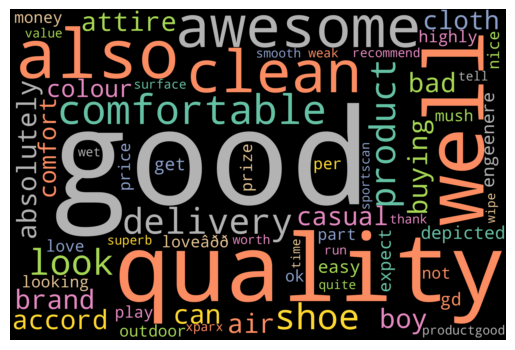

In [35]:
# Generate a word cloud from the term scores
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate_from_frequencies(dict(term_scores))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#From the Wordcloud it is very clear shoes are very **good** in terms of **quality** **look** and **comfort**, most of the Reviewers giving positive response for the shoes 